## Histograms

In [97]:
# Histograms are frequency plots
# Kernel density estimation plots

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def_path = 'DATA/sudoku.jpg'

def load_img(path = def_path, type = 'rgb'):
    if(type == 'gray'):
        img = cv2.imread(path, 0)
    else:
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def disp(img, type = 'gray'):
    fig = plt.figure(figsize = (15, 15))
    ax = fig.add_subplot(111)
    if(type == 'gray'):
        ax.imshow(img, cmap = 'gray')
    else:
        ax.imshow(img)
        
def disp_hist(img, mask = 'None', channels = ['b', 'g', 'r']):
    # Init the color values
    color = ['b', 'g', 'r']
    
    # Plot the histogram for all the colors
    for i,col in enumerate(color):
        hist = cv2.calcHist([img], [i], mask, [256], [0,256])
        plt.plot(hist, color = col)
        plt.xlim([0,256])

In [98]:
# Init the images
horse_bgr = cv2.imread('DATA/horse.jpg') # original bgr image to render using opencv
horse = load_img('DATA/horse.jpg') # rgb image to display using matplotlib
rainbow_bgr = cv2.imread('DATA/rainbow.jpg')
rainbow = load_img('DATA/rainbow.jpg')
bricks_bgr = cv2.imread('DATA/bricks.jpg')
bricks = load_img('DATA/bricks.jpg')
print(horse.shape)
print(rainbow.shape)
print(bricks.shape)

(1800, 2700, 3)
(550, 413, 3)
(950, 1267, 3)


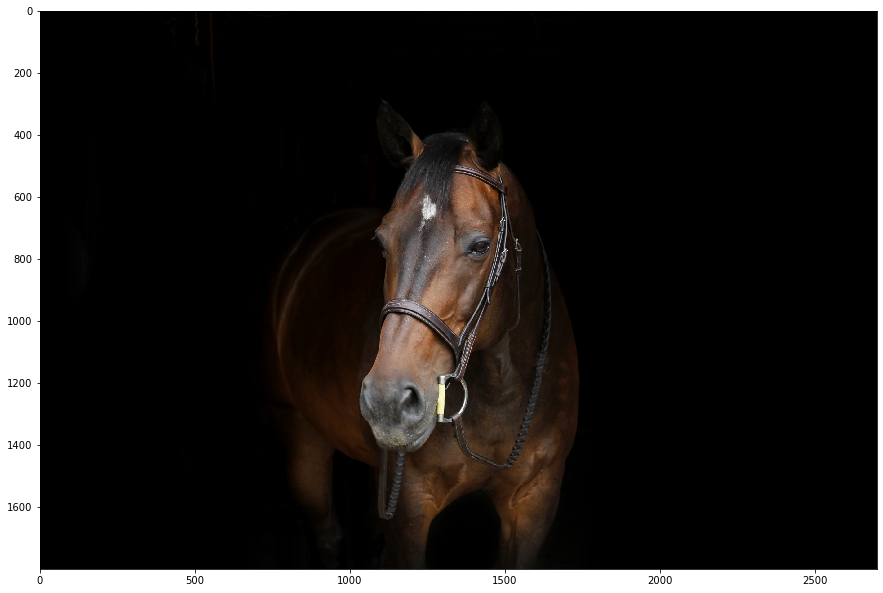

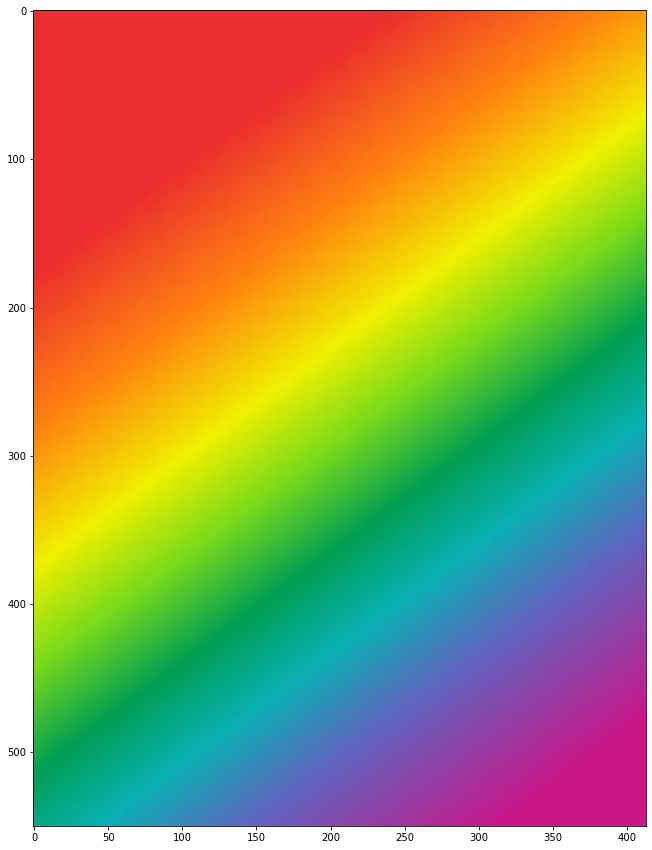

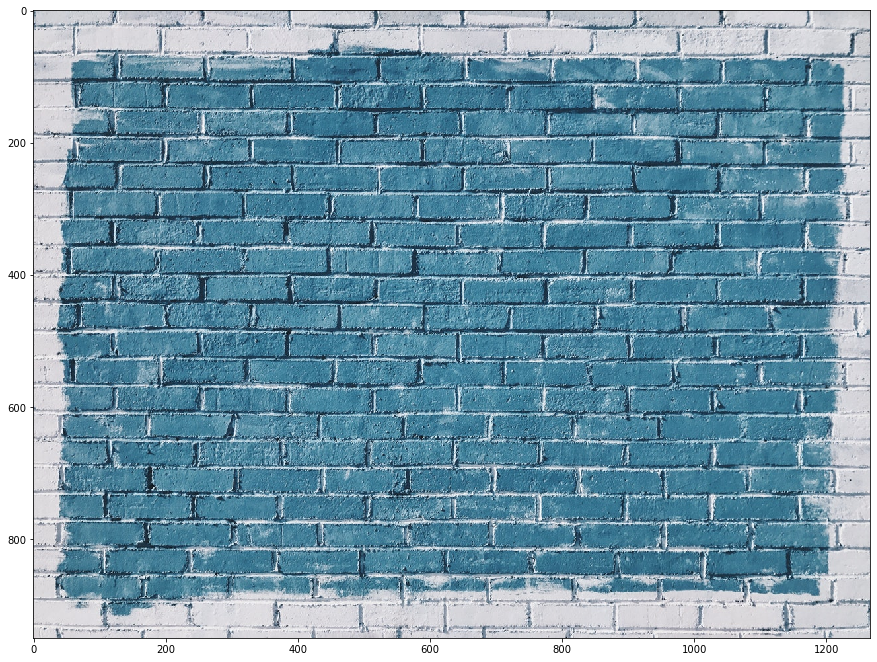

In [99]:
disp(horse)
disp(rainbow)
disp(bricks)

In [100]:
# Get the histogram values
hist_values_brick = cv2.calcHist([bricks_bgr], channels = [0], mask = None, histSize = [256], ranges = [0, 256]) # exclusive of 256
hist_values.shape

(256, 1)

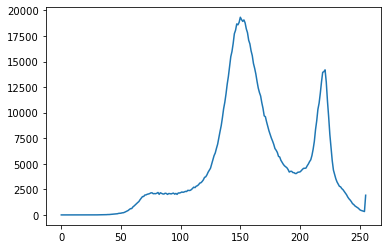

In [101]:
plt.plot(hist_values)

In [102]:
hist_values_horse = cv2.calcHist(images = [horse_bgr], channels = [2], mask = None, histSize = [256], ranges = [0,256])
hist_values_horse.shape

(256, 1)

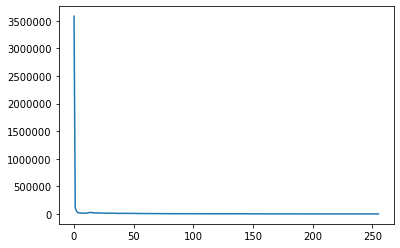

In [103]:
plt.plot(hist_values_horse)

Text(0.5, 1.0, 'Bricks histogram')

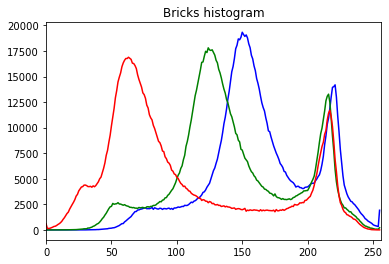

In [104]:
color = ['b', 'g', 'r']
img = bricks_bgr.copy()

for i,col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0,256])
    
plt.title('Bricks histogram')

Text(0.5, 1.0, 'Horse histogram')

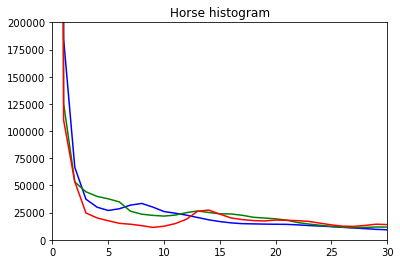

In [105]:
color = ['b', 'g', 'r']
img = horse_bgr.copy()

for i,col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0,30])
    plt.ylim([0,200000])
    
plt.title('Horse histogram')

### Histogram on masked images

In [106]:
img = rainbow.copy()
img.shape

(550, 413, 3)

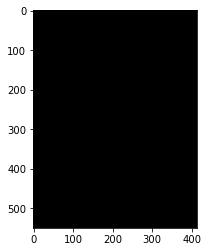

In [107]:
mask = np.zeros(img.shape[:2], np.uint8)
plt.imshow(mask, cmap = 'gray')

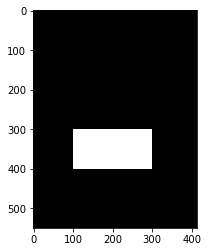

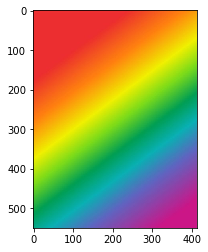

In [108]:
mask_new = mask.copy()
mask_new[300:400, 100:300] = 255
plt.figure(0)
plt.imshow(mask_new, cmap = 'gray')
plt.figure(1)
plt.imshow(rainbow)

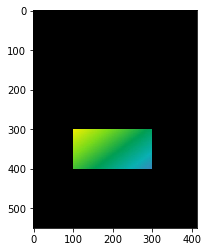

In [109]:
masked_img = cv2.bitwise_and(rainbow_bgr, rainbow_bgr, mask = mask_new)
disp_masked_img = cv2.bitwise_and(rainbow, rainbow, mask = mask_new)

plt.figure(1)
plt.imshow(disp_masked_img)

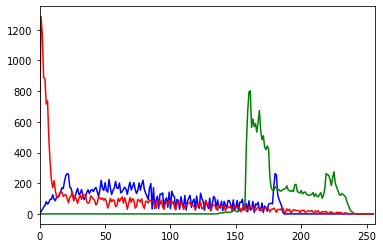

In [110]:
disp_hist(rainbow_bgr, mask_new)

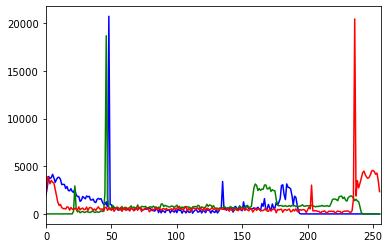

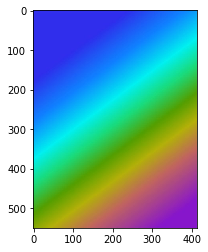

In [117]:
disp_hist(rainbow_bgr, None)
plt.figure(0)
plt.imshow(rainbow_bgr)

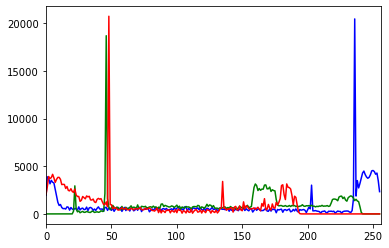

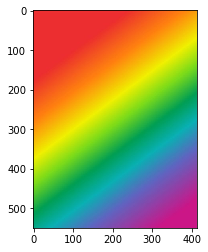

In [121]:
disp_hist(rainbow, None)
plt.figure(2)
plt.imshow(rainbow)

## Histogram Equalization (equalizeHist())

(1295, 1955)


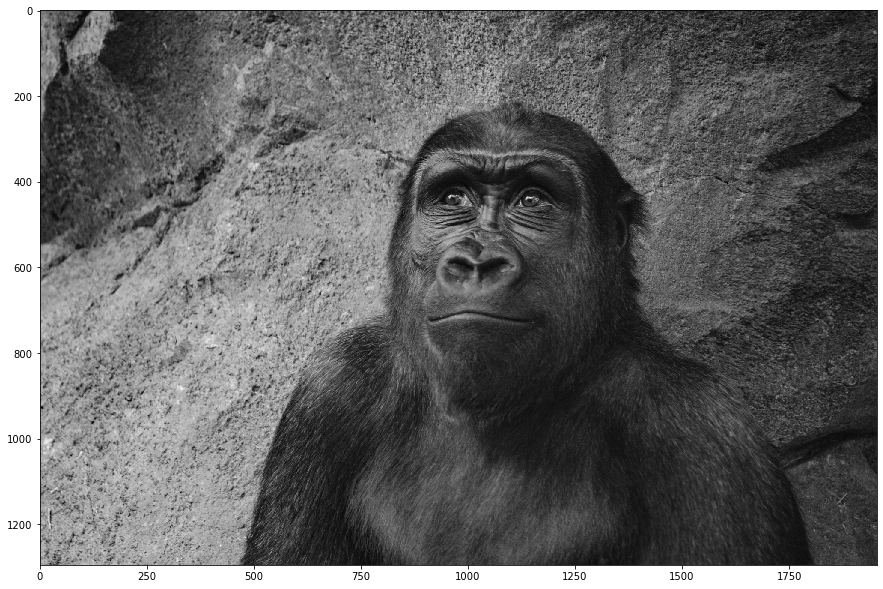

In [124]:
# Significance: Increases the contrast of the image by spreading the histogram of the image

gor_img = load_img('DATA/gorilla.jpg', 'gray')
disp(gor_img, 'gray')
print(gor_img.shape)

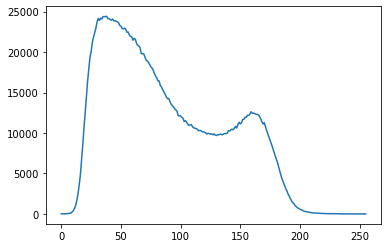

In [125]:
img = gor_img.copy()
hist_values = cv2.calcHist([gor_img], [0], None, [256], [0,256])
plt.plot(hist_values)


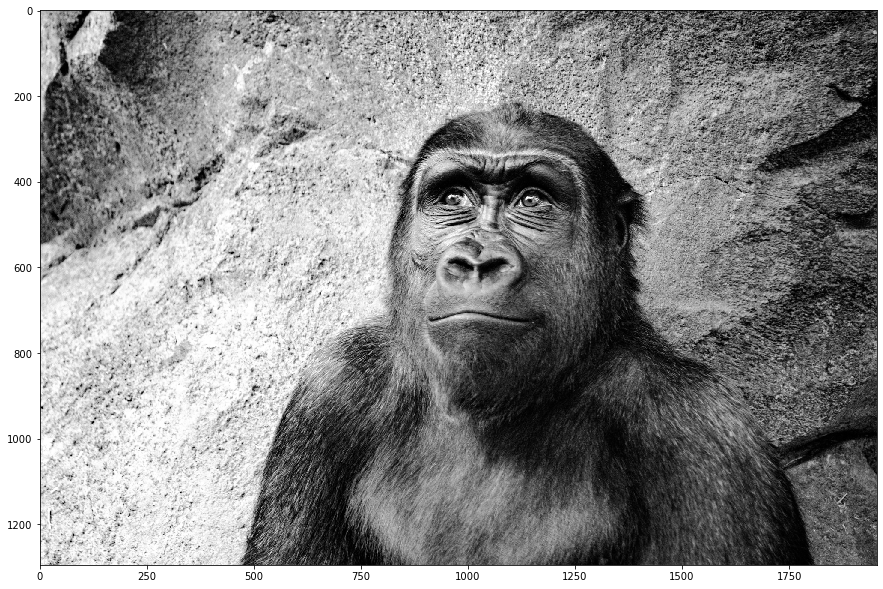

In [126]:
eq_gor_img = cv2.equalizeHist(gor_img)
disp(eq_gor_img)

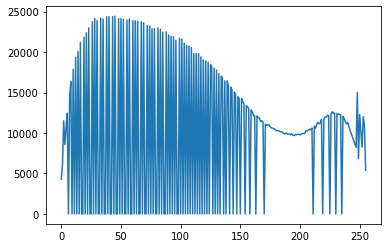

In [127]:
hist_val_eq1 = cv2.calcHist([eq_gor_img], [0], None, [256], [0, 256])
plt.plot(hist_val_eq1)

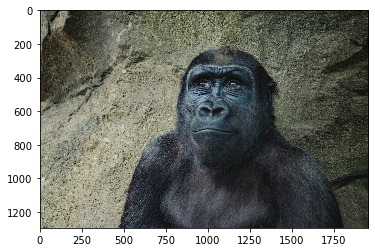

In [128]:
# Colored gorilla
gor_img_col = load_img('DATA/gorilla.jpg')
gor_img_col_bgr = cv2.imread('DATA/gorilla.jpg')
img = gor_img_col.copy()
img_bgr = gor_img_col_bgr.copy()
plt.imshow(img)

#### Conversion to HSV

In [129]:
# To equalize a colored image, we need to transform the image into an HSV color space rather than RGB
hsv_img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

# get the value channel from the HSV file
hsv_img[:,:,2]

array([[127, 121, 115, ...,  43,  42,  42],
       [121, 124, 123, ...,  47,  49,  51],
       [118, 129, 131, ...,  47,  50,  53],
       ...,
       [196, 198, 185, ...,  55,  55,  55],
       [184, 185, 182, ...,  51,  52,  53],
       [174, 170, 173, ...,  49,  50,  50]], dtype=uint8)

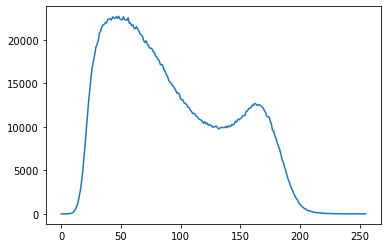

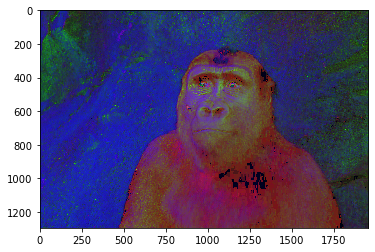

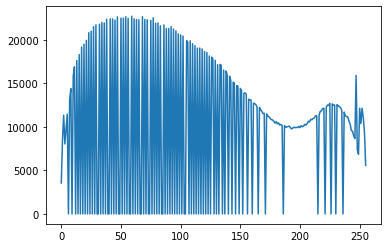

In [141]:
hist_val_prev = cv2.calcHist([hsv_img[:,:,2]], [0], None, [256], [0, 256])

# Histogram for the unequalized image
plt.figure(1)
plt.plot(hist_val_prev)

# HSV image
plt.figure(2)
plt.imshow(hsv_img)
eq_img = cv2.equalizeHist(hsv_img[:,:,2])
hsv_img_fin = hsv_img.copy()
hsv_img_fin[:,:,2] = eq_img

# Histogram for the equalized image
plt.figure(3)
hist_val_cur = cv2.calcHist([eq_img], [0], None, [256], [0, 256])
plt.plot(hist_val_cur)

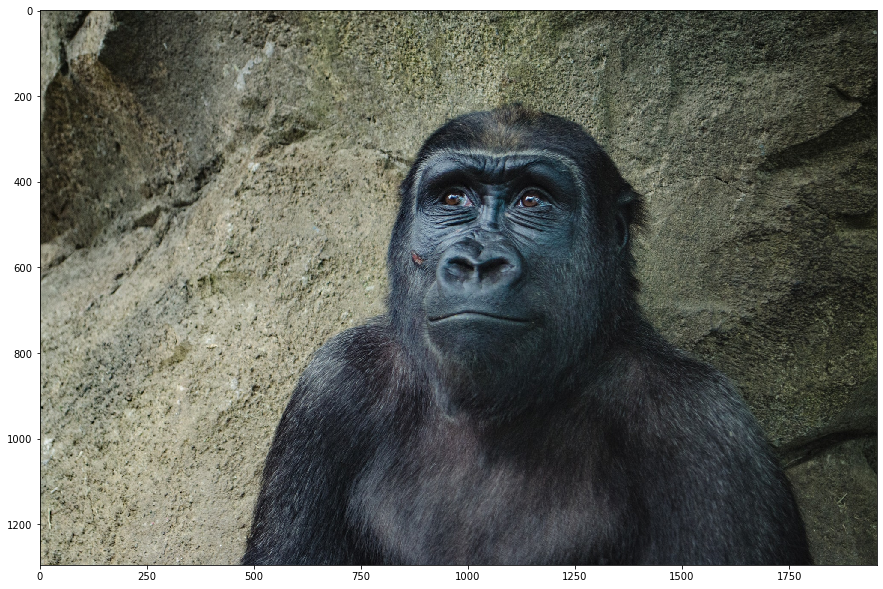

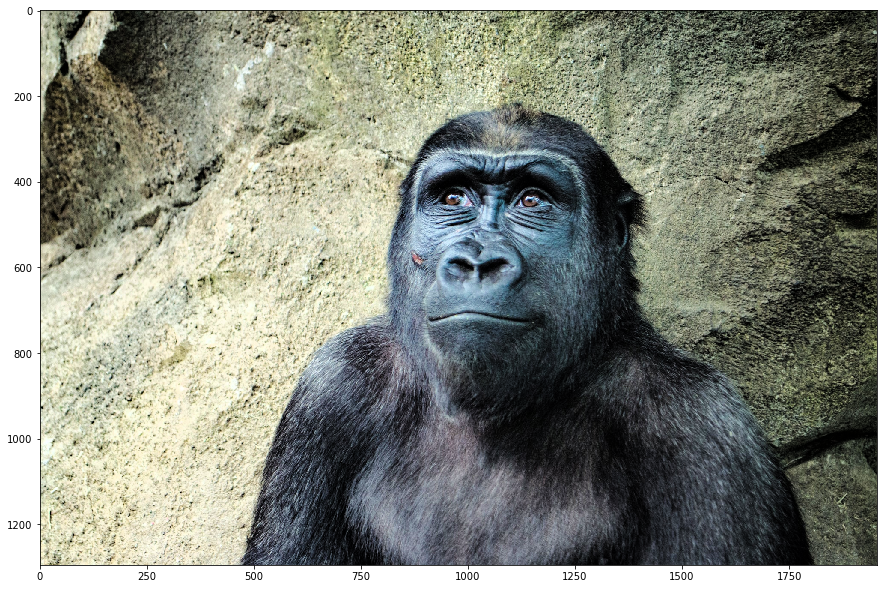

In [146]:
img_eq = cv2.cvtColor(hsv_img_fin, cv2.COLOR_HSV2RGB)

disp(img)
disp(img_eq)
